# Applying the CRISP-DM Method to a Business Problem

CRISP-DM stands for cross-industry process for data mining. It provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

This model is an idealised sequence of events. In practice many of the tasks can be performed in a different order and it will often be necessary to backtrack to previous tasks and repeat certain actions.


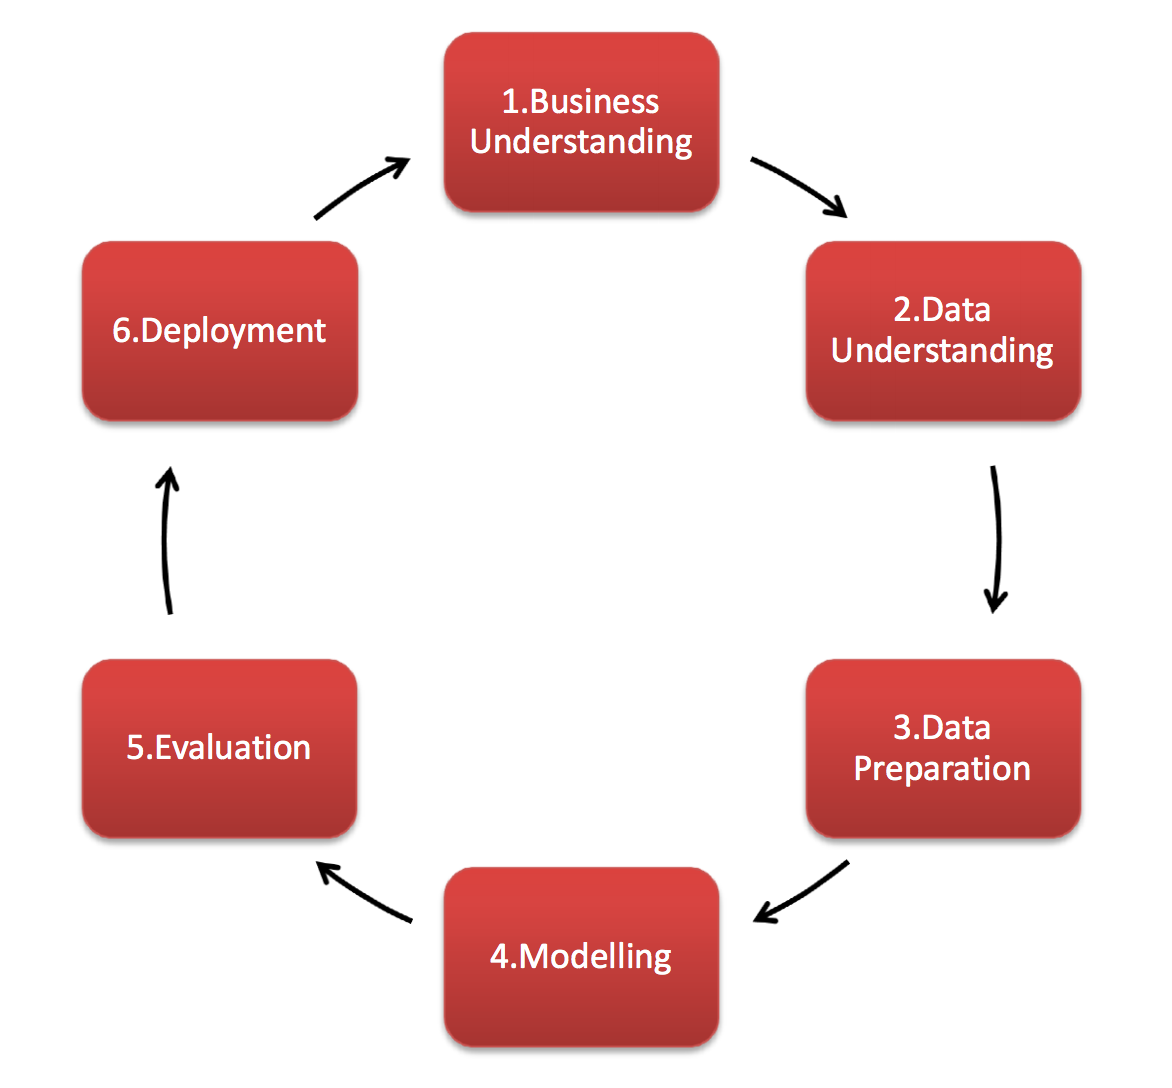

**Each phase of the process:**
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)
    3. [Initial Data Exploration](#Exploredata) 
    4. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers) 
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Datatypes](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
    1. [Modelling Technique](#ModellingTechnique)
    2. [Modelling Assumptions](#ModellingAssumptions)
    3. [Build Model](#BuildModel)
    4. [Assess Model](#AssessModel)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

https://www.sv-europe.com/crisp-dm-methodology/


In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Optima LT Std'
plt.rcParams['font.sans-serif'] = 'Palatino LT Std'

## 4. Visual Analytics

In [2]:
df = pd.read_pickle('flotation_plant.pkl')

In [3]:
df.head()

iron_p  silica_p  starch_f  amina_f    ore_f   ore_pH  \
datetime                                                                     
2017-07-29 07:45:20   57.46      10.8   4310.75  508.545  397.090  10.0188   
2017-07-29 07:45:40   57.46      10.8   4336.64  507.568  396.211  10.0215   
2017-07-29 07:46:00   57.46      10.8   4352.02  516.113  393.457  10.0242   
2017-07-29 07:46:20   57.46      10.8   4358.71  512.329  396.855  10.0270   
2017-07-29 07:46:40   57.46      10.8   4362.83  516.235  403.711  10.0297   

                     ore_density  c1_air_f  c2_air_f  c3_air_f  ...  c7_air_f  \
datetime                                                        ...             
2017-07-29 07:45:20      1.67734   250.664   309.242   302.387  ...   296.235   
2017-07-29 07:45:40      1.67722   251.807   302.388   300.850  ...   295.708   
2017-07-29 07:46:00      1.67711   251.499   300.103   300.762  ...   294.302   
2017-07-29 07:46:20      1.67700   252.422   300.454   300.103  ...   293.994   
2017-07-29 07:46:40      1.67688   251.279   301.289   299.927  ...   297.334   

                     c1_level    c2_level  c3_level  c4_level  c5_level  \
datetime                                                                  
2017-07-29 07:45:20   474.470  822.906164   411.461   368.672   362.084   
2017-07-29 07:45:40   488.477  823.088877   395.922   351.484   348.865   
2017-07-29 07:46:00   495.083  823.271589   385.887   330.859   341.484   
2017-07-29 07:46:20   514.000  823.454301   381.139   336.016   316.589   
2017-07-29 07:46:40   515.710  823.637014   370.887   332.969   329.587   

                     c6_level  c7_level  final_iron_p  final_silica_p  
datetime                                                               
2017-07-29 07:45:20   340.180   341.317         64.62            4.55  
2017-07-29 07:45:40   361.350   341.428         64.62            4.55  
2017-07-29 07:46:00   358.101   353.566         64.62            4.55  
2017-07-29 07:46:20   366.502   359.525         64.62            4.55  
2017-07-29 07:46:40   339.956   362.505         64.62            4.55  

[5 rows x 23 columns]

En primer lugar vamos a comprobar si hay algun tipo de patrón en la calidad de la materia prima de entrada. En realidad, seguramente, no querra decir nada, porque el SiO2 obtenido al final, es un requisito del cliente, para obtener distintos aceros

In [4]:
input_material = ['iron_p', 'silica_p']

In [5]:
df[input_material].describe()

iron_p       silica_p
count  184364.000000  184364.000000
mean       53.925443      17.258644
std         4.281784       6.740836
min        42.740000       1.310000
25%        48.810000      10.800000
50%        54.590000      15.980000
75%        57.460000      24.900000
max        65.780000      33.400000

In [6]:
df[input_material].std()/df[input_material].mean()*100

iron_p       7.940192
silica_p    39.057740
dtype: float64

El contenido de hierro es bastante constante, con una variación de 8%, mientras que el de silica varía bastante más. 

Vamos a usar el paquete `statsmodel` para descomponer estas series temporales en *level*, *trend*, *seassonal* y *noise*. Estos componentes pueeden combinarse para obtener los datos observados mediante muchos modelos. Los más simples son el modelo de adición, donde se suman todos los componentes,  y el de multiplicación, donde se multiplican.

### 4.1 Additive model

datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   NaN
2017-09-09 22:00:00   NaN
2017-09-09 23:00:00   NaN
Freq: H, Name: trend, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00    0.025039
2017-07-29 08:00:00    0.032688
2017-07-29 09:00:00    0.040337
2017-07-29 10:00:00    0.047985
2017-07-29 11:00:00    0.055634
                         ...   
2017-09-09 19:00:00    0.024642
2017-09-09 20:00:00    0.027450
2017-09-09 21:00:00    0.030257
2017-09-09 22:00:00    0.033065
2017-09-09 23:00:00    0.035872
Freq: H, Name: seasonal, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


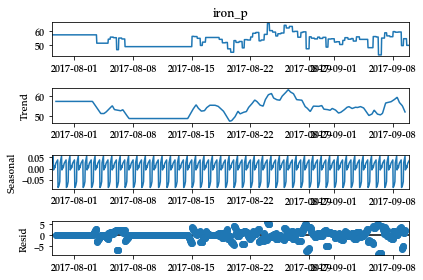

In [7]:
iron_p = df[input_material[0]]
# data should be resample to 1 minute at least for the automatic decompositon
iron_p = iron_p.resample('H').mean()
result = seasonal_decompose(iron_p, model='additive')

print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.savefig('figures/seassonality/add_iron.pdf')
plt.show()

La `seasonality` es muy pequeña comparada con los valores realdes.  Y  `trend` sigue muy de cerca la forma de los datos observados. Por lo que parece que esta serie no tiene estacionalidad bajo este modelo. Veamos que pasa para la silica.

datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   NaN
2017-09-09 22:00:00   NaN
2017-09-09 23:00:00   NaN
Freq: H, Name: trend, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00    0.105683
2017-07-29 08:00:00    0.093382
2017-07-29 09:00:00    0.081080
2017-07-29 10:00:00    0.068779
2017-07-29 11:00:00    0.056477
                         ...   
2017-09-09 19:00:00   -0.203791
2017-09-09 20:00:00   -0.205874
2017-09-09 21:00:00   -0.207957
2017-09-09 22:00:00   -0.210041
2017-09-09 23:00:00   -0.212124
Freq: H, Name: seasonal, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


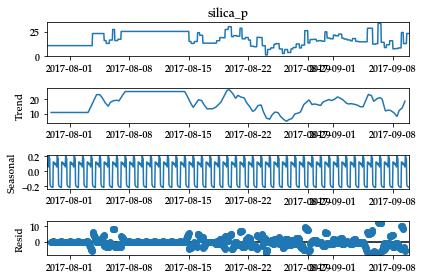

In [8]:
silica_p = df[input_material[1]]
# data should be resample to 1 minute at least for the automatic decompositon
silica_p = silica_p.resample('H').mean()
result = seasonal_decompose(silica_p, model='additive')

print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.savefig('figures/seassonality/add_silica.pdf')
plt.show()

La `seasonality` es muy pequeña comparada con los valores realdes. Y  `trend` sigue muy de cerca la forma de los datos observados. Por lo que parece que esta serie no tiene estacionalidad bajo este modelo. Veamos que pasa para la silica.

### 4.1 Multiplicative model

In [9]:
iron_p = df[input_material[0]]
# data should be resample to 1 minute at least for the automatic decompositon
iron_p = iron_p.resample('H').mean()
result = seasonal_decompose(iron_p, model='multiplicative')

print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.savefig('figures/seassonality/mul_iron.pdf')
plt.show()

datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   NaN
2017-09-09 22:00:00   NaN
2017-09-09 23:00:00   NaN
Freq: H, Name: trend, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00    1.000277
2017-07-29 08:00:00    1.000419
2017-07-29 09:00:00    1.000580
2017-07-29 10:00:00    1.000759
2017-07-29 11:00:00    1.000958
                         ...   
2017-09-09 19:00:00    1.000558
2017-09-09 20:00:00    1.000599
2017-09-09 21:00:00    1.000662
2017-09-09 22:00:00    1.000745
2017-09-09 23:00:00    1.000848
Freq: H, Name: seasonal, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


La `seasonality` es muy pequeña comparada con los valores realdes.  Y  `trend` sigue muy de cerca la forma de los datos observados. Por lo que parece que esta serie no tiene estacionalidad bajo este modelo. Veamos que pasa para la silica.

datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   NaN
2017-09-09 22:00:00   NaN
2017-09-09 23:00:00   NaN
Freq: H, Name: trend, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00    1.012042
2017-07-29 08:00:00    1.011422
2017-07-29 09:00:00    1.011353
2017-07-29 10:00:00    1.011820
2017-07-29 11:00:00    1.012813
                         ...   
2017-09-09 19:00:00    0.987795
2017-09-09 20:00:00    0.987623
2017-09-09 21:00:00    0.988053
2017-09-09 22:00:00    0.989109
2017-09-09 23:00:00    0.990826
Freq: H, Name: seasonal, Length: 1025, dtype: float64
datetime
2017-07-29 07:00:00   NaN
2017-07-29 08:00:00   NaN
2017-07-29 09:00:00   NaN
2017-07-29 10:00:00   NaN
2017-07-29 11:00:00   NaN
                       ..
2017-09-09 19:00:00   NaN
2017-09-09 20:00:00   NaN
2017-09-09 21:00:00   

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


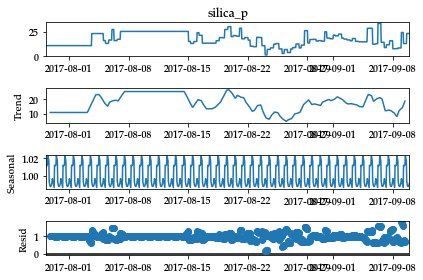

In [10]:
silica_p = df[input_material[1]]
# data should be resample to 1 minute at least for the automatic decompositon
silica_p = silica_p.resample('H').mean()
result = seasonal_decompose(silica_p, model='multiplicative')

print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
plt.savefig('figures/seassonality/mul_silica.pdf')
plt.show()

La `seasonality` es muy pequeña comparada con los valores realdes.  Y  `trend` sigue muy de cerca la forma de los datos observados. Por lo que parece que esta serie no tiene estacionalidad bajo este modelo. Veamos que pasa para la silica.

### Autocorrelación

Ya se ha visto que no hay una gran correlación de las features entre sí (expecto `iron_final_p` y `silica_final_p`. Vamos a a estudiar ahora, si hay alguna correlacción interna del `silica_final.p`.

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


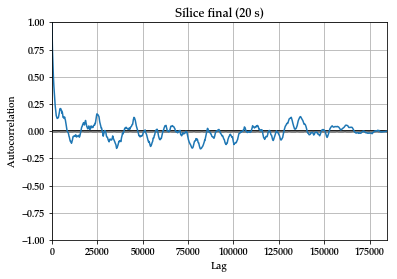

In [11]:
autocorrelation_plot(df['final_silica_p'])
plt.title('Sílice final (20 s)')
plt.savefig('figures/autocorr/20s_final_silica.pdf')

Se puede observar que hay correlación en tramos de `lag` de aproximadamente la mitad del grid mostrado (25000/2 = 12500). Esto puede ser, por ejemplo, que en esos periodos ($12500\times20\,\mathrm{s}\approx 70\,\mathrm{h}$).  

Vamos a resamplear el dataframe a 1 hora para seguir estudiando mejor dicha correlación

In [12]:
final_silica = df['final_silica_p']
#print(final_silica)
resample1h = final_silica.resample('1H').mean()
#print(resample1h)
autocorrelation_plot(resample1h)
plt.title('Sílice final (1 h)')
plt.savefig('figures/autocorr/1h_final_silica.pdf')

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Sigue habiendo correlacción entre medias horarias. ¿Que ocurre con los días?

In [13]:
resample1d = final_silica.resample('1D').mean()
autocorrelation_plot(resample1d)
plt.title('Sílice final (1 d)')
plt.savefig('figures/autocorr/1d_final_silica.pdf')

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Los valores están por debajo del 95% de confianza, por lo que podemos decir que la correlación no va más alla de un día. ¿Se mantine la correlación en turnos de trabajo? (tomaremos turnos que empiezan a las 8:00 y son de 8 horas; 8-16-24).

In [14]:
final_silica_shifts = final_silica['2017-07-29 08:00:00':]
final_silica_shifts = final_silica_shifts.resample('8H').mean()
final_silica_shifts.head(5)
autocorrelation_plot(final_silica_shifts)
plt.title('Sílice final (8 h)')
plt.savefig('figures/autocorr/8h_final_silica.pdf')

'PalatinoLTStd-Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


No parece que, en general, haya correlación entre la cantidad de siilco entre distintos turnos de trabajo.

In [ ]:
data_cleaned = pd.read_csv('data_cleaned.csv', parse_dates=True, index_col=)